# A TensorFlow MNIST handwritten digit recogniser

### The following Notebook uses TensorFlow to create a multilayer convolutional neural network capable of recongising handwritten digits from the MNIST dataset.


In [5]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

import tensorflow as tf

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


### The following trained classifier has a prediction accuracy of just under 99%.

In [15]:
# Initialise placeholder for training data, 784 elemements to store 28*28 pixel flattened images
X = tf.placeholder(tf.float32, [None, 784])

K = 4
L = 8
M = 12

# Iniitalise variable for storing weights
W1 = tf.Variable(tf.truncated_normal([5, 5, 1, K], stddev=0.1)) #784 x 200
b1 = tf.Variable(tf.ones([K])/10)

W2 = tf.Variable(tf.truncated_normal([5, 5, K, L], stddev=0.1)) # 200 x 100
b2 = tf.Variable(tf.ones([L])/10)

W3 = tf.Variable(tf.truncated_normal([4, 4, L, M], stddev=0.1)) # 100 x 60
b3 = tf.Variable(tf.zeros([M])/10)

N = 200

W4 = tf.Variable(tf.truncated_normal([7*7*M, N], stddev=0.1)) # 60 x 30
b4 = tf.Variable(tf.ones([N])/10)

W5 = tf.Variable(tf.truncated_normal([N, 10], stddev=0.1)) # 30 x 10
b5 = tf.Variable(tf.zeros([10])/10)

init = tf.global_variables_initializer()

X = tf.reshape(X, [-1, 28, 28, 1])
Y1 = tf.nn.relu(tf.nn.conv2d(X, W1, strides=[1,1,1,1], padding='SAME') + b1)
Y2 = tf.nn.relu(tf.nn.conv2d(Y1, W2, strides=[1,2,2,1], padding='SAME') + b2)
Y3 = tf.nn.relu(tf.nn.conv2d(Y2, W3, strides=[1,2,2,1], padding='SAME') + b3)
YY = tf.reshape(Y3, shape=[-1, 7*7*M])

Y4 = tf.nn.sigmoid(tf.matmul(YY, W4) + b4) # using relu for all layers resulted in NaN errors
Y = tf.nn.softmax(tf.matmul(Y4, W5) + b5)

Y_ = tf.placeholder(tf.float32, [None, 10])

# Loss function
cross_entropy = -tf.reduce_sum(Y_ * tf.log(Y))

# % correct answers found in batch
is_correct = tf.equal(tf.argmax(Y,1), tf.argmax(Y_, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# Using gradient descent with step size 0.003 with cross entropy loss funciton
optimizer = tf.train.GradientDescentOptimizer(0.003)
train_step = optimizer.minimize(cross_entropy)

# Start TensorFlow session and initalise
sess = tf.Session()
sess.run(init)
listA1 = []
listA2 = []
for i in range(10000):
    # Get the next set of 100 images to use as training data
    batch_X, batch_Y = mnist.train.next_batch(100)
  
    
    train_data={X: batch_X.reshape((len(batch_X), 28, 28, 1)), Y_: batch_Y}
    
    # Run training on train data
    sess.run(train_step, feed_dict=train_data)
    
    # Get accuracy and cross_entropy
    a1,c = sess.run([accuracy, cross_entropy], feed_dict=train_data)
    listA1.append(a1)
    if(i%1000 == 0):
        test_data = {X:mnist.test.images.reshape((len(mnist.test.images), 28, 28, 1)), Y_:mnist.test.labels}
        a2,c = sess.run([accuracy, cross_entropy], feed_dict=test_data)
        listA2.append(a2)
        print("i: {:d} a: {:f} c: {:f}".format(i,a2,c))
    else:
        listA2.append(a2)

i: 0 a: 0.119200 c: 24553.564453
i: 1000 a: 0.973600 c: 880.521057
i: 2000 a: 0.981000 c: 600.374756
i: 3000 a: 0.983900 c: 499.207184
i: 4000 a: 0.984100 c: 465.091339
i: 5000 a: 0.985700 c: 421.543488
i: 6000 a: 0.987700 c: 387.146973
i: 7000 a: 0.987300 c: 387.882477
i: 8000 a: 0.987700 c: 390.282043
i: 9000 a: 0.988600 c: 387.184509


## Plot of training and test accuracies. 

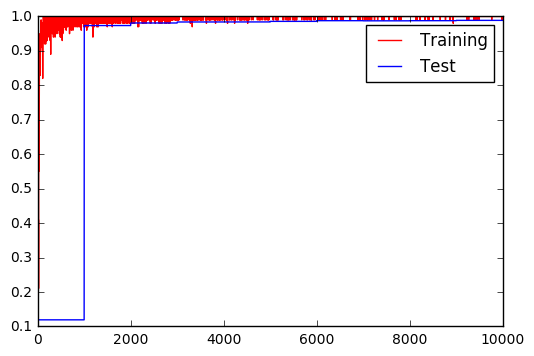

In [38]:
%matplotlib inline 
import matplotlib.pyplot as plt
plt.plot(listA1, "r-", label="Training")
plt.plot(listA2, "b-", label="Test")
plt.legend()
plt.show()

## The following code reads in one image from the MNIST dataset and predicts the value present using the trained classifier.

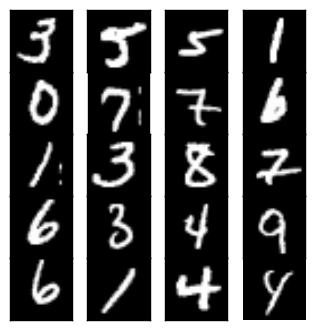

[3, 5, 5, 1]
[0, 7, 7, 6]
[1, 3, 8, 2]
[6, 3, 4, 9]
[6, 1, 4, 4]


In [39]:

fig=plt.figure(figsize=(4, 4))
fig.subplots_adjust(hspace=0, wspace=0)
columns = 4
rows = 5
results = []
row = []
for i in range(1, columns*rows +1):
    batch = mnist.test.next_batch(1)
    plotData = batch[0]
    plotData = plotData.reshape(28, 28)
    plt.gray() # use this line if you don't want to see it in color
    fig.add_subplot(rows, columns, i)
    cur_axes = plt.gca()
    cur_axes.axes.get_xaxis().set_visible(False)
    cur_axes.axes.get_yaxis().set_visible(False)
    plt.imshow(plotData)
    

    answer = sess.run(Y, feed_dict={X: plotData.reshape(1, 28,28,1)})
    x  = sess.run(tf.argmax(answer, 1))
    
    row.append(x[0])
    if(i % 4 == 0):
        results.append(row)
        row = []
plt.axis('off')
plt.show()
for result in results:
    print(result)